# Sentiment Analysis

## Data importing


In [1]:
import pandasql as ps
import pandas as pd
import glob
from textblob import TextBlob
from matplotlib import pyplot as plt

In [2]:
path = r'./'
df = pd.read_json(path + '/clean_data.json',orient='index')
df

,time,text
0,2019-05-14,$djia $spx #tnx\n\n10 year treasury is inverte...
1,2019-05-20,$spx - is 5g the next global warming/climate ...
2,2019-07-15,"$gush $drip $spx $oil $oilnf \non january 1, ..."
3,2019-08-05,"i&#39;m no rocket scientist, but i&#39;m prett..."
4,2019-08-28,"$cpst $husa $nvax $spx general markets, exempl..."
...,...,...
1632,2021-09-22,$spy $djia $qqq $spx \n\nsuch a tragedy what w...
1633,2021-09-22,$spy $doge.x $shib.x i guarantee artificial in...
1634,2021-09-22,$zom $iwm 🦍🦍🦍 manipulation 101 monday they cut...
1635,2021-10-05,$gevo can china just collapse already so we ca...


## Extracting polarity values with TextBlob

In [3]:
polarity=[]
for index, value in df['text'].items():
    polarity.append(TextBlob(value).sentiment.polarity)

df['polarity']=polarity
df


,time,text,polarity
0,2019-05-14,$djia $spx #tnx\n\n10 year treasury is inverte...,-0.062500
1,2019-05-20,$spx - is 5g the next global warming/climate ...,0.000000
2,2019-07-15,"$gush $drip $spx $oil $oilnf \non january 1, ...",0.082273
3,2019-08-05,"i&#39;m no rocket scientist, but i&#39;m prett...",0.170238
4,2019-08-28,"$cpst $husa $nvax $spx general markets, exempl...",-0.061852
...,...,...,...
1632,2021-09-22,$spy $djia $qqq $spx \n\nsuch a tragedy what w...,-0.059167
1633,2021-09-22,$spy $doge.x $shib.x i guarantee artificial in...,-0.108333
1634,2021-09-22,$zom $iwm 🦍🦍🦍 manipulation 101 monday they cut...,-0.070988
1635,2021-10-05,$gevo can china just collapse already so we ca...,-0.117143


## Getting monthly averages

In [4]:
#Extracting year, and month to calculate averages after.
df['time']=pd.to_datetime(df['time'])
df['year']=df['time'].dt.year
df['month']=df['time'].dt.month
df

,time,text,polarity,year,month
0,2019-05-14,$djia $spx #tnx\n\n10 year treasury is inverte...,-0.062500,2019,5
1,2019-05-20,$spx - is 5g the next global warming/climate ...,0.000000,2019,5
2,2019-07-15,"$gush $drip $spx $oil $oilnf \non january 1, ...",0.082273,2019,7
3,2019-08-05,"i&#39;m no rocket scientist, but i&#39;m prett...",0.170238,2019,8
4,2019-08-28,"$cpst $husa $nvax $spx general markets, exempl...",-0.061852,2019,8
...,...,...,...,...,...
1632,2021-09-22,$spy $djia $qqq $spx \n\nsuch a tragedy what w...,-0.059167,2021,9
1633,2021-09-22,$spy $doge.x $shib.x i guarantee artificial in...,-0.108333,2021,9
1634,2021-09-22,$zom $iwm 🦍🦍🦍 manipulation 101 monday they cut...,-0.070988,2021,9
1635,2021-10-05,$gevo can china just collapse already so we ca...,-0.117143,2021,10


In [5]:
# Cheking that we have data for every month
q=""" SELECT year, month, COUNT(*) AS count
FROM df
GROUP BY year, month
ORDER BY year, month
"""
df_count=ps.sqldf(q)
df_count


,year,month,count
0,2019,5,17
1,2019,6,15
2,2019,7,21
3,2019,8,44
4,2019,9,42
5,2019,10,28
6,2019,11,23
7,2019,12,17
8,2020,1,46
9,2020,2,100


In [6]:
#Calculating avergade amount of twits per month
q=""" SELECT  AVG(count)
FROM df_count
"""
average_amount_of_monthly_twits=ps.sqldf(q)
average_amount_of_monthly_twits

,AVG(count)
0,54.566667


We aproximately have 55 twits per month.

In [7]:
#Calculating the polarity averages
q=""" SELECT year, month, AVG(polarity) AS polarity
FROM df
GROUP BY year, month
ORDER BY year, month
"""
df_avg=ps.sqldf(q)


In [8]:
#Building the Date Format we need
df_avg['year'] = df_avg['year'].astype(str)
df_avg['month'] = df_avg['month'].map('{:02}'.format)
df_avg['time'] = df_avg['year'] + '-'+ df_avg['month'] + '-01'
df_avg.drop(columns=['year','month'],inplace=True)
df_avg = df_avg[['time', 'polarity']]
df_avg

,time,polarity
0,2019-05-01,0.090052
1,2019-06-01,0.009056
2,2019-07-01,0.094307
3,2019-08-01,0.153068
4,2019-09-01,0.060827
5,2019-10-01,0.042113
6,2019-11-01,-0.001290
7,2019-12-01,0.011503
8,2020-01-01,0.045848
9,2020-02-01,0.058723


In [9]:
#Saving what we obtained
df_avg.to_csv('stocktwits_sentiment_analysis.csv', index=False)

## Comparison with published data

In a recent publication [1], data regarding sentiment analysis in environmental stocktwits has been published.

In this section we are going to compare our data with this data.

[1] Santi, C. (2020). Investors’ Climate Sentiment and Financial Markets. Available at SSRN.

### Importing published data

In [10]:
path = r'/home/mariana/Archivo/Data_Science_ Portfolio/WID_SIGTech_Residency/sentiment_analysis' # use your path
df_ref = pd.read_csv(path + '/ClimateSentiment.csv')
df_ref

,date,climate_sentiment,social_interaction
0,2010-01-01,-0.144972,82.581733
1,2010-02-01,-0.026529,100.000000
2,2010-03-01,-0.175538,30.356907
3,2010-04-01,-0.015808,27.385149
4,2010-05-01,-0.168423,57.576654
...,...,...,...
112,2019-05-01,0.021578,51.434765
113,2019-06-01,0.028504,61.347151
114,2019-07-01,0.058599,59.114277
115,2019-08-01,0.030850,63.052658


## Is it possible to extend the published data with our data?

Published data runs from January of 2010 to September of 2019. In the paper it is reported that after the preprocessing they were left with 370 posts per month.

Our data runs from May  to October 2021. The main idea is to extend the publish data with our data to use it ater in a financial strategy design. 

There are some differences in the construction of both datasets
* The published data counted on 370 posts per moth to calculate averages. In our case, we had aroun 50 posts per month.
* Published data was analized using the R package sentimentr, while our data was studied using the python package TextBlob. 



Since we have some months of superposition between the datasets we wil start by plotting the datasets together in order to see how they look.

(-0.2, 0.2)

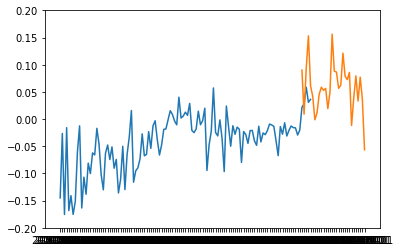

In [11]:
_=plt.plot(df_ref['date'],df_ref['climate_sentiment'], label='published data')
_=plt.plot(df_avg['time'],df_avg['polarity'],label='our data')
plt.ylim(-0.2,0.2)

We find differences between the published data and ours probably due to the number of processed twits. 

We still see simmilar tendencies, so we are going to extend the published data with our data and see what happens when applied to a financial strategy.